<a href="https://colab.research.google.com/github/Kirushikesh/signlanguageclassification/blob/main/SignlanguageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the problem :**

We need to predict the sign language symbols using CNN. The problem can be modified as a Supervised Learning Problem. Since the target column is discrete the problem can be further classified as Classification problem.

**Understanding the Dataset :**

The dataset contains 27455 training images and 7172 test images all with a shape of 28 x 28 pixels. These images belong to the 24 classes of English alphabet starting from A to Z except J and Z because of the gesture motions. The dataset on Kaggle is available in the CSV format where training data has 27455 rows and 785 columns. The first column of the dataset represents the class label of the image and the remaining 784 columns represent the 28 x 28 pixels. The same paradigm is followed by the test data set.

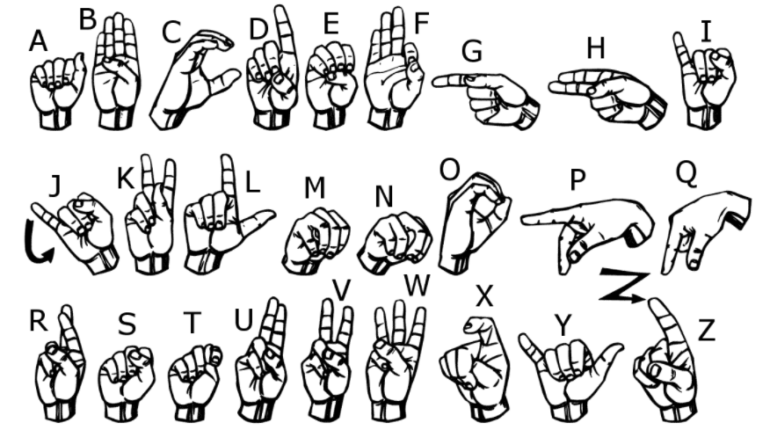

**Importing Required Libraries :**

In [ ]:
from matplotlib import pyplot as plt
from google.colab import files
import pandas as pd
from keras.utils.np_utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Importing the Dataset from Kaggle**

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krooz0","key":"ed62a3403a4c73b7362379f0fd625e68"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d datamunge/sign-language-mnist
! unzip sign-language-mnist.zip 

 56% 35.0M/62.6M [00:00<00:00, 66.9MB/s]
100% 62.6M/62.6M [00:00<00:00, 128MB/s] 
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
train=pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [ ]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

Y_test = test["label"]
X_test = test.drop(labels = ["label"],axis = 1)

**Data Analysis**

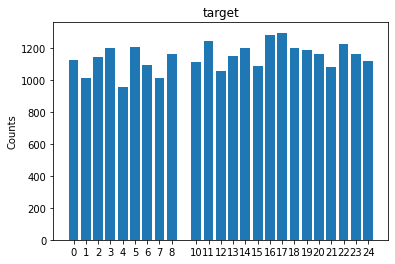

In [ ]:
var = train['label']
count = var.value_counts()
plt.bar(count.index, count)
plt.xticks(count.index, count.index.values)
plt.ylabel("Counts")
plt.title('target')
plt.show()

**Data Visualising**

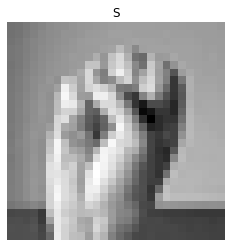

In [ ]:
img = X_train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(class_names[train.iloc[10,0]])
plt.axis("off")
plt.show()

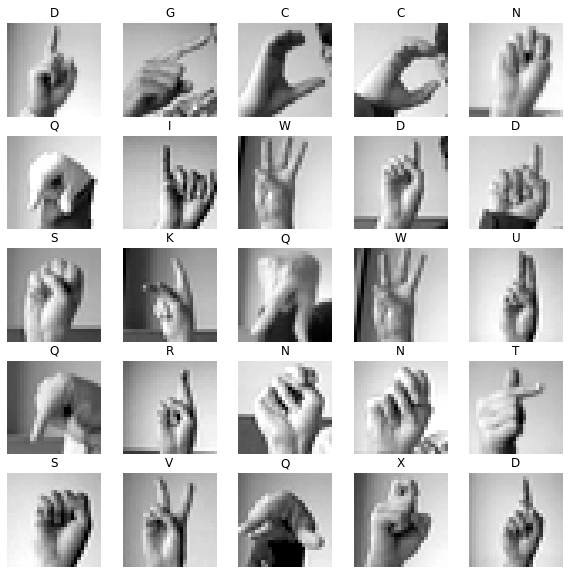

In [ ]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.grid(False)
  img = X_train.iloc[i].to_numpy()
  img = img.reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.title(class_names[Y_train.iloc[i]])
  plt.axis("off")
plt.show()

**Data Preprocessing** 

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 784)
x_test shape:  (7172, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 28, 28, 1)
x_test shape:  (7172, 28, 28, 1)


In [ ]:
# Label Encoding 
Y_train = to_categorical(Y_train, num_classes = 25)
Y_test = to_categorical(Y_test, num_classes = 25)

**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

**Building the Model**

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [ ]:
epochs = 30  
batch_size = 128
history = cnn_model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),validation_data = (X_test,Y_test), 
                              epochs = epochs,steps_per_epoch=X_train.shape[0]// batch_size)

Epoch 1/30
214/214 [==============================] - 39s 38ms/step - loss: 0.2407 - accuracy: 0.0440 - val_loss: 0.1743 - val_accuracy: 0.0747
Epoch 2/30
214/214 [==============================] - 8s 35ms/step - loss: 0.1610 - accuracy: 0.0960 - val_loss: 0.1353 - val_accuracy: 0.3112
Epoch 3/30
214/214 [==============================] - 8s 36ms/step - loss: 0.1318 - accuracy: 0.2515 - val_loss: 0.0973 - val_accuracy: 0.4993
Epoch 4/30
214/214 [==============================] - 8s 35ms/step - loss: 0.1063 - accuracy: 0.4120 - val_loss: 0.0727 - val_accuracy: 0.6624
Epoch 5/30
214/214 [==============================] - 8s 36ms/step - loss: 0.0877 - accuracy: 0.5282 - val_loss: 0.0546 - val_accuracy: 0.7476
Epoch 6/30
214/214 [==============================] - 8s 36ms/step - loss: 0.0739 - accuracy: 0.6118 - val_loss: 0.0429 - val_accuracy: 0.8105
Epoch 7/30
214/214 [==============================] - 8s 36ms/step - loss: 0.0633 - accuracy: 0.6724 - val_loss: 0.0346 - val_accuracy: 0.843

**Model Evaluation**

In [ ]:
cnn_model.evaluate(X_test,Y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9947


[0.0017142544966191053, 0.994701623916626]

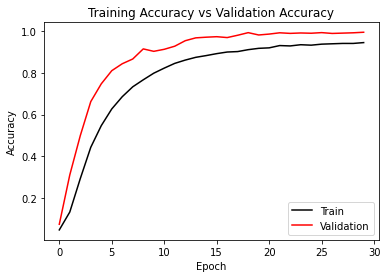

In [ ]:
plt.plot(history.history['accuracy'], color='black',)
plt.plot(history.history['val_accuracy'], color='red',)
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

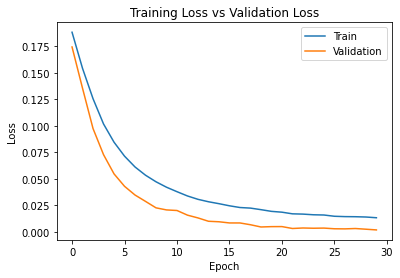

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Confusion Matrix

# Predict the values from the validation dataset
Y_pred = cnn_model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

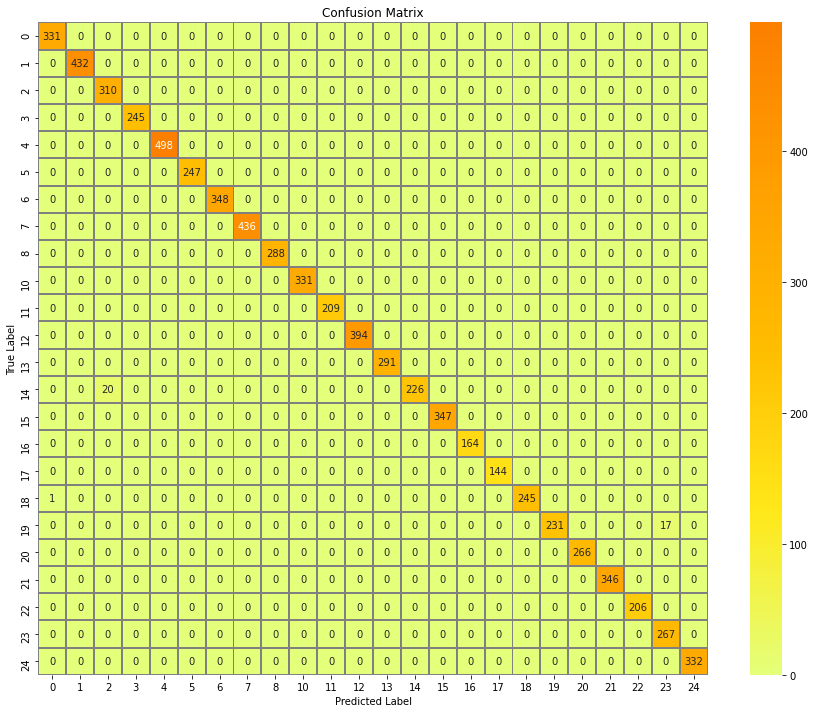

In [ ]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=1,cmap="Wistia",linecolor="gray", fmt= '',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Conclusion**

Our CNN Model is able to classify the alphabets with 97% accuracy.

In [ ]:
cnn_model.save('mycnn.h5',overwrite=True)

**Resources**

1. https://www.kaggle.com/hkubra/mnist-cnn-with-keras-99-accuracy
2. https://analyticsindiamag.com/hands-on-guide-to-sign-language-classification-using-cnn/
3. https://github.com/harshbg/Sign-Language-Interpreter-using-Deep-Learning
4. https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/